## Installing dependencies

In [ ]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()

Saving Image_Classification.zip to Image_Classification.zip


In [ ]:
import zipfile
import io

# Specify the name of the uploaded zip file
zip_file_name = "Image_Classification.zip"

# Unzip the file
with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r') as zip_ref:
    zip_ref.extractall("Image_Classification")

In [ ]:
!pip install tensorflow  opencv-python matplotlib --quiet
# Successfully installed

In [ ]:
!pip list --quiet

In [29]:
import tensorflow as tf
import os

In [30]:
#List out gpus and enable memory usage
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Data Cleaning

In [76]:
import cv2
import imghdr #check File extensions
from matplotlib import pyplot as plt

In [44]:
pwd

'/content/Image_Classification/data'

In [47]:
data_dir = '/content/Image_Classification/Image_Classification/data'

In [48]:
os.listdir(data_dir)

['Rainy', 'sunny', '.ipynb_checkpoints']

In [49]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [50]:
for image_class in os.listdir(data_dir): # data
    for image in os.listdir(os.path.join(data_dir, image_class)): # S n R
        image_path = os.path.join(data_dir, image_class, image) # For each image path
        try:
            img = cv2.imread(image_path) # Converts the image to a numy arr
            tip = imghdr.what(image_path) # If its not a valid image path
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path) # Remove the image
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/Image_Classification/Image_Classification/data/Rainy/vector3.svg
Image not in ext list /content/Image_Classification/Image_Classification/data/Rainy/vector24.svg
Image not in ext list /content/Image_Classification/Image_Classification/data/Rainy/vector12.svg
Image not in ext list /content/Image_Classification/Image_Classification/data/Rainy/vector23.svg
Image not in ext list /content/Image_Classification/Image_Classification/data/Rainy/vector14.svg
Image not in ext list /content/Image_Classification/Image_Classification/data/Rainy/vector22.svg
Image not in ext list /content/Image_Classification/Image_Classification/data/Rainy/rain-drops-during-raining-rainy-260nw-1686587542.jpg
Image not in ext list /content/Image_Classification/Image_Classification/data/Rainy/vector29.svg
Image not in ext list /content/Image_Classification/Image_Classification/data/Rainy/vector8.svg
Image not in ext list /content/Image_Classification/Image_Classification/data/Rainy/vecto

In [81]:
img = cv2.imread(os.path.join('data_dir', 'sunny', 'image6.jpeg'))
img.shape
#cv2.cvtColor,cv2.COLOR_BGR2RGB - makes a color image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Load Data

In [85]:
import numpy as np
from matplotlib import pyplot as plt

In [90]:
pwd

'/content/Image_Classification/Image_Classification/data'

In [101]:
tf.keras.utils.image_dataset_from_directory??

In [124]:
# Builds a pipeline and a dataset on the fly - resize/label
# data = tf.keras.utils.image_dataset_from_directory('data', batch_size=16, image_size=(128,128))
data = tf.keras.utils.image_dataset_from_directory('/content/Image_Classification/Image_Classification/data')


Found 65 files belonging to 2 classes.


In [96]:
#Access the generator(dataset) from our pipeline and loop through to get batches
data_iterator = data.as_numpy_iterator()

In [98]:
data_iterator

In [106]:
#Grabbing a batch, batch size 32 images
batch = data_iterator.next()

In [107]:
#Labels
batch[1]

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int32)

In [108]:
#Images
batch[0]

array([[[[5.80000000e+01, 1.03000000e+02, 1.58000000e+02],
         [5.80000000e+01, 1.03000000e+02, 1.58000000e+02],
         [5.80722656e+01, 1.03072266e+02, 1.58072266e+02],
         ...,
         [8.30000000e+01, 1.44000000e+02, 2.09000000e+02],
         [8.35566406e+01, 1.43443359e+02, 2.09000000e+02],
         [8.40000000e+01, 1.43000000e+02, 2.09000000e+02]],

        [[5.80000000e+01, 1.03000000e+02, 1.58000000e+02],
         [5.80000000e+01, 1.03000000e+02, 1.58000000e+02],
         [5.80722656e+01, 1.03072266e+02, 1.58072266e+02],
         ...,
         [8.30000000e+01, 1.44000000e+02, 2.09000000e+02],
         [8.35566406e+01, 1.43443359e+02, 2.09000000e+02],
         [8.40000000e+01, 1.43000000e+02, 2.09000000e+02]],

        [[5.80000000e+01, 1.03000000e+02, 1.58000000e+02],
         [5.80000000e+01, 1.03000000e+02, 1.58000000e+02],
         [5.80722656e+01, 1.03072266e+02, 1.58072266e+02],
         ...,
         [8.30000000e+01, 1.44000000e+02, 2.09000000e+02],
         [

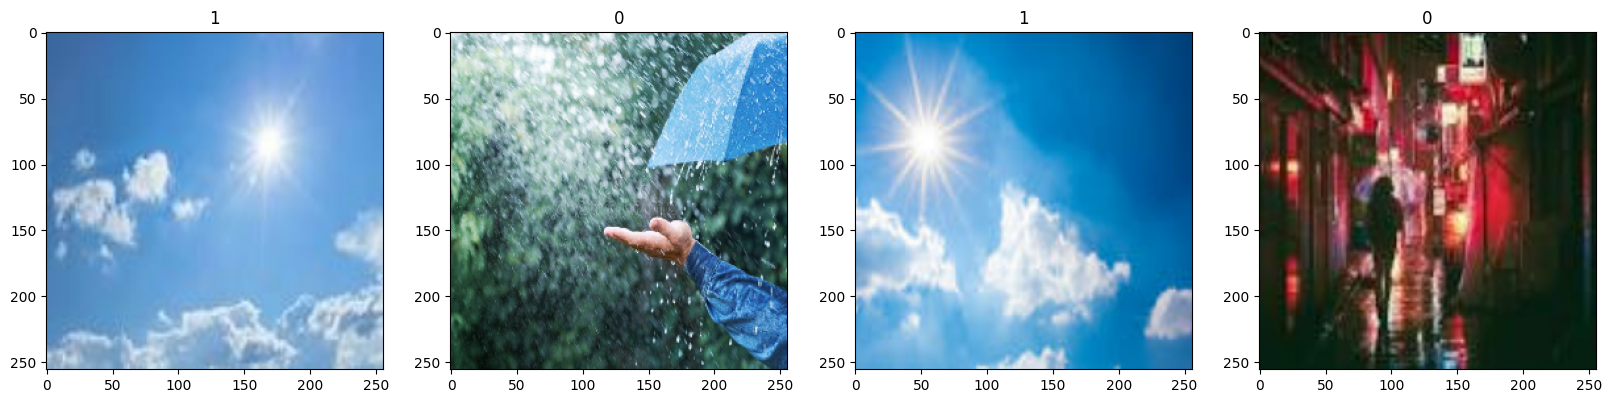

In [110]:
# Which label goes with which image
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scale Data

Scale the data while loading to the data pipeline for faster processing

In [125]:
# map function should transform and return a new dataset, only the scale the images in a batch and leave the labels be
scaled = data.map(lambda x,y: (x/255, y))

In [128]:
batch = scaled.as_numpy_iterator().next()

In [133]:
batch[0]

array([[[[0.46666667, 0.57254905, 0.60784316],
         [0.47221202, 0.57809436, 0.6133885 ],
         [0.47651654, 0.5823989 , 0.617693  ],
         ...,
         [0.08463541, 0.16306679, 0.25718445],
         [0.07288603, 0.1513174 , 0.24543504],
         [0.07843138, 0.15686275, 0.2509804 ]],

        [[0.4508272 , 0.5567096 , 0.5920037 ],
         [0.46248108, 0.5683634 , 0.60365754],
         [0.47300103, 0.5788834 , 0.6141775 ],
         ...,
         [0.08614287, 0.16457424, 0.25869188],
         [0.06975864, 0.14819   , 0.24230765],
         [0.07123162, 0.14966299, 0.24378064]],

        [[0.42588848, 0.5317708 , 0.56706494],
         [0.44716007, 0.5530424 , 0.5883365 ],
         [0.467466  , 0.57334834, 0.60864246],
         ...,
         [0.08851629, 0.16694766, 0.2610653 ],
         [0.06483465, 0.14326602, 0.23738368],
         [0.05989583, 0.13832721, 0.23244485]],

        ...,

        [[0.5694853 , 0.6047794 , 0.7185049 ],
         [0.5694853 , 0.6047794 , 0.7185049 ]

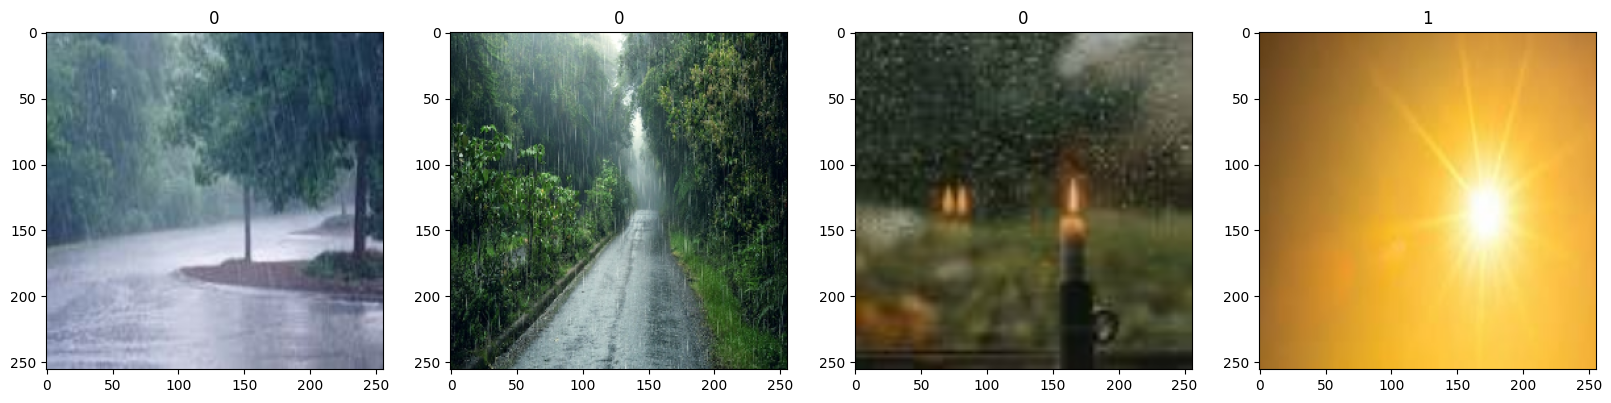

In [130]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) # Visualize each img after being scaled
    ax[idx].title.set_text(batch[1][idx])

### Split data

In [153]:
# No.of batches
len(data)

3

In [148]:
train_size = int(len(data)*.5)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

In [151]:
test_size

1

In [154]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Building the Deep Learning model

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
#Conv2d - CNN layer
#MaxP - Filtering
#Flatten - Flatten the feature maps
#Dense - Classifier
#Dropout - REgularization

In [157]:
model = Sequential()

In [158]:
#Input layer 16 filters, 3x3 stride 1 and input_shape is the nature of the image
model.add(Conv2D(16, (3,3), 1, activation='relu', padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D()) # first feature map

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [159]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [160]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### Train model

In [161]:
pwd

'/content/Image_Classification/Image_Classification/data'

In [162]:
cd ..

/content/Image_Classification/Image_Classification


In [163]:
pwd

'/content/Image_Classification/Image_Classification'

In [164]:
mkdir logs

In [169]:
logdir = 'logs'

In [170]:
# logs the training model to the folder logs so its easy to identify where mistakes could have happened
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [171]:
# train set, val set, all data saved to logs
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
1/1 [==============================] - 8s 8s/step - loss: 0.6993 - accuracy: 0.4688 - val_loss: 0.9786 - val_accuracy: 0.5938
Epoch 2/20
1/1 [==============================] - 5s 5s/step - loss: 1.1408 - accuracy: 0.5312 - val_loss: 0.6352 - val_accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 5s 5s/step - loss: 0.6303 - accuracy: 0.7812 - val_loss: 0.6579 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 5s 5s/step - loss: 0.7049 - accuracy: 0.3438 - val_loss: 0.5936 - val_accuracy: 0.8125
Epoch 5/20
1/1 [==============================] - 5s 5s/step - loss: 0.5981 - accuracy: 0.7812 - val_loss: 0.7280 - val_accuracy: 0.5938
Epoch 6/20
1/1 [==============================] - 6s 6s/step - loss: 0.6245 - accuracy: 0.6562 - val_loss: 0.5665 - val_accuracy: 0.8125
Epoch 7/20
1/1 [==============================] - 6s 6s/step - loss: 0.5372 - accuracy: 0.8125 - val_loss: 0.5314 - val_accuracy: 0.7188
Epoch 8/20
1/1 [=========================

### Plot performance

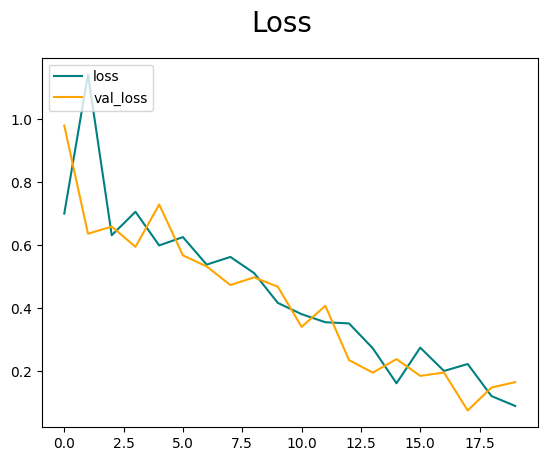

In [172]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

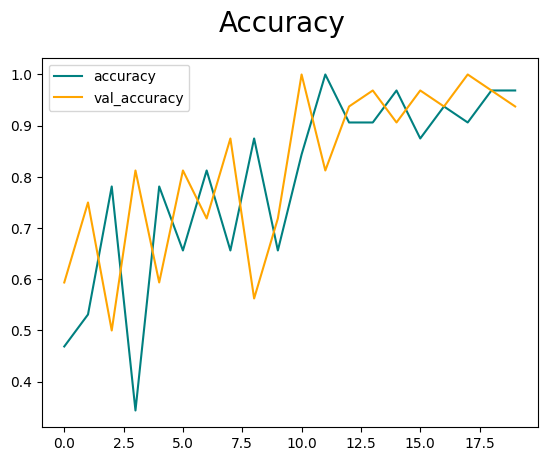

In [173]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


### Evaluate

In [174]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [176]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [177]:
for batch in test.as_numpy_iterator(): # test batches
    X, y = batch # In that batch we have x(images) and corresponding true values
    yhat = model.predict(X) # input the images and get the predictions
    # The predicted and the true values will be compared
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 202ms/step


In [179]:
print(f"Precision: {pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


## Evaluate

Testing the data with an image never seen

In [ ]:
'''
img = cv2.imread('')
plt.imshow(img)
plt.show()

In [ ]:
'''
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
# yhat = model.predict(np.expand_dims(resize/255, 0)) - expand_dims wrapping it in another set to make it look like batch input

In [ ]:
'''
if yhat > 0.5:
    print(f'Predicted class is Sunny')
else:
    print(f'Predicted class is Rainy')

## Save model

In [180]:
from tensorflow.keras.models import load_model

In [181]:
model.save(os.path.join('models','weather.h5')) # Folder name and file name serialized

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [184]:
new_model = load_model('models/weather.h5') # Load the saved model

In [186]:
# Test the saved model
# new_model.predict(np.expand_dims(resize/255, 0))